# Data Processing

### Getting a dataset of steps.

Our application needs to classify type of gait and count steps.
To do this, we need to obtain an 'idea' of what a single 'step' looks like.
Therefore, we should attempt to split up 10, 30 and 100-step records into respectively a dataset of 10, 30 and 100-step elements.

### Cleaning dataset up.

Unfortunately, the data isn't perfect. There are a couple of problems with it:
* There are periods in the beginning and end of recordings in which the subject doesn't move, so we get inaccurate records when we split it up.
* The steps are not always equal, so splitting in equal intervals is challenging - some of the resulting steps might include half a step from the previous one for example.
* There is noise in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from splitters import record_splitter
from loaders import data_loader
from processors import initial_noise_processor


In [6]:
%matplotlib notebook

## Addressing the initial noise

<IPython.core.display.Javascript object>


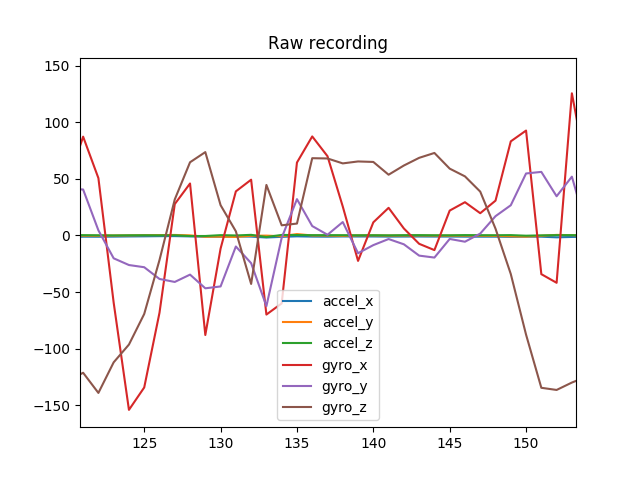

In [7]:
# Demonstrating code that currently cuts out initial noise of recording and splits up the steps

filename = '../data/Group C - Joao Walking, 100, Upper Leg Left.csv'
usecols=['accel_x', 'accel_y', 'accel_z','gyro_x', 'gyro_y', 'gyro_z']

# load data
loader = data_loader.StepRecordDataLoader(filename, usecols)
data_frame = loader.get_data_frame()
number_of_steps = loader.get_number_of_steps()
data_frame.plot(title="Raw recording")
plt.show()